<a href="https://colab.research.google.com/github/Sumit0919/VOIS_AICTE_Oct2025_MajorProject_Sumit_Sinha08/blob/main/SumitSinha_Neflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the pandas library, giving it the alias 'pd'
import pandas as pd

# Define the filename (make sure it matches the uploaded file exactly)
filename = "Netflix Dataset (1).csv"

# Use pandas to read the CSV file into a DataFrame called 'df'
df = pd.read_csv(filename)

# Display the first 5 rows of the DataFrame to confirm it loaded correctly
print("Dataset loaded successfully. First 5 rows:")
print(df.head())

Dataset loaded successfully. First 5 rows:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    

Explore the Data Structure and Missing Values

In [2]:
# Display detailed information about the DataFrame
# Shows column names, number of non-missing values, and data types (like object, int64, float64)
print("Dataset Info:")
df.info()
print("-" * 50) # Just prints a separator line

# Count missing values (NaN or NaT) in each column again
print("Missing Values Before Cleaning:")
print(df.isnull().sum())
print("-" * 50)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
--------------------------------------------------
Missing Values Before Cleaning:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type              

Clean and Prepare the Data

In [3]:
# Convert 'Release_Date' column to datetime objects.
# 'errors='coerce'' makes bad dates into NaT (Not a Time)
print("Converting Release_Date...")
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract the year into a new 'Year' column
print("Extracting Year...")
df['Year'] = df['Release_Date'].dt.year

# Fill missing values (NaN) with placeholder text
print("Filling missing Director, Cast, Country, Rating...")
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

# --- Important Check for Bad Dates ---
# Count how many rows have NaT in 'Release_Date' (meaning the original date was bad)
invalid_dates_count = df['Release_Date'].isnull().sum()
print(f"Found {invalid_dates_count} rows with invalid dates that couldn't be converted.")

# Remove rows where 'Year' is missing (because 'Release_Date' was NaT)
print("Removing rows with invalid years...")
df.dropna(subset=['Year'], inplace=True)

# Convert 'Year' column to integer type now that missing ones are removed
print("Converting Year column to integer...")
df['Year'] = df['Year'].astype(int)

# Extract the first genre listed in the 'Type' column into 'Main_Genre'
print("Extracting Main_Genre...")
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

print("\nData Cleaning Complete.")
print("-" * 50)

# --- Check the result of cleaning ---
print("Dataset Info After Cleaning:")
df.info()
print("-" * 50)

print("Missing Values After Cleaning:")
print(df.isnull().sum())
print("-" * 50)

print("First 5 rows after cleaning:")
print(df.head())

Converting Release_Date...
Extracting Year...
Filling missing Director, Cast, Country, Rating...
Found 98 rows with invalid dates that couldn't be converted.
Removing rows with invalid years...
Converting Year column to integer...
Extracting Main_Genre...

Data Cleaning Complete.
--------------------------------------------------
Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7691 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7691 non-null   object        
 1   Category      7691 non-null   object        
 2   Title         7691 non-null   object        
 3   Director      7691 non-null   object        
 4   Cast          7691 non-null   object        
 5   Country       7691 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7691 non-null   object        
 8   Duration      7691 non-null   ob

Basic EDA Code

In [4]:
# --- Exploratory Data Analysis (EDA) - Basic Insights ---

# Count of Movies vs TV Shows in the cleaned data
print("Category Distribution (Movies vs TV Shows):")
print(df['Category'].value_counts())
print("-" * 50) # Separator line

# Top 5 Countries contributing content (now includes 'Unknown' where originally missing)
print("Top 5 Countries (including 'Unknown'):")
print(df['Country'].value_counts().head(5))
print("-" * 50)

# Verify the time span (Year range) covered by the dataset after cleaning
print("Dataset covers years from:")
print(df['Year'].min(), "to", df['Year'].max())
print("-" * 50)

Category Distribution (Movies vs TV Shows):
Category
Movie      5379
TV Show    2312
Name: count, dtype: int64
--------------------------------------------------
Top 5 Countries (including 'Unknown'):
Country
United States     2516
India              922
Unknown            503
United Kingdom     381
Japan              222
Name: count, dtype: int64
--------------------------------------------------
Dataset covers years from:
2008 to 2021
--------------------------------------------------


1. Line Chart: Movies vs. TV Shows Added Over Years

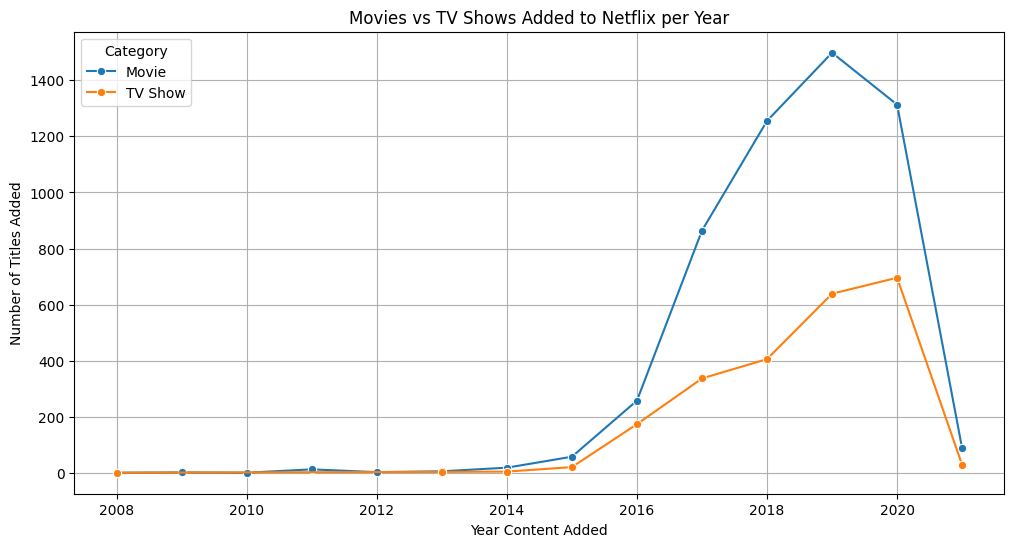

In [5]:
# --- Visualization 1: Movies vs TV Shows Added Per Year ---
import matplotlib.pyplot as plt # Make sure matplotlib is imported
import seaborn as sns # Make sure seaborn is imported

# Group data by Year and Category, count the number of titles
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

# Create the line plot
plt.figure(figsize=(12, 6)) # Set the size of the plot
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Added to Netflix per Year")
plt.xlabel("Year Content Added")
plt.ylabel("Number of Titles Added")
plt.grid(True) # Add grid lines for readability

# Save the plot to a file (optional, but useful for your PPT)
plt.savefig("movies_vs_tvshows_per_year.png")

plt.show() # Display the plot

2. Bar Chart: Top 10 Genres

/tmp/ipython-input-3499654777.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis", orient='h')


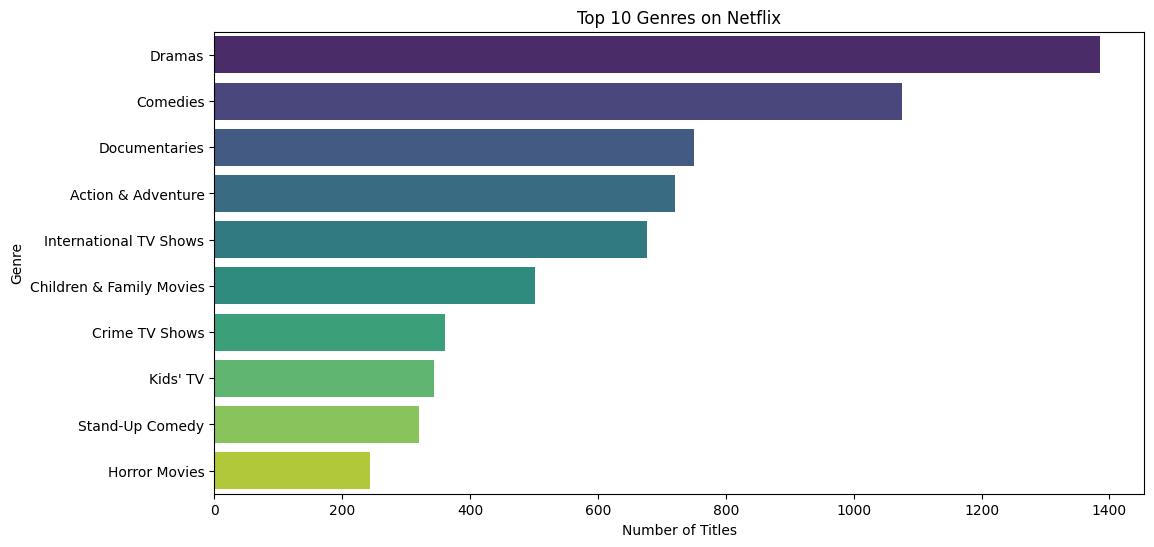

In [6]:
# --- Visualization 2: Top 10 Genres ---
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each 'Main_Genre' and get the top 10
top_genres = df['Main_Genre'].value_counts().head(10)

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis", orient='h')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")

# Save the plot
plt.savefig("top_10_genres.png")

plt.show()

3. Stacked Bar Chart: Movies vs. TV Shows by Country (Top 10)

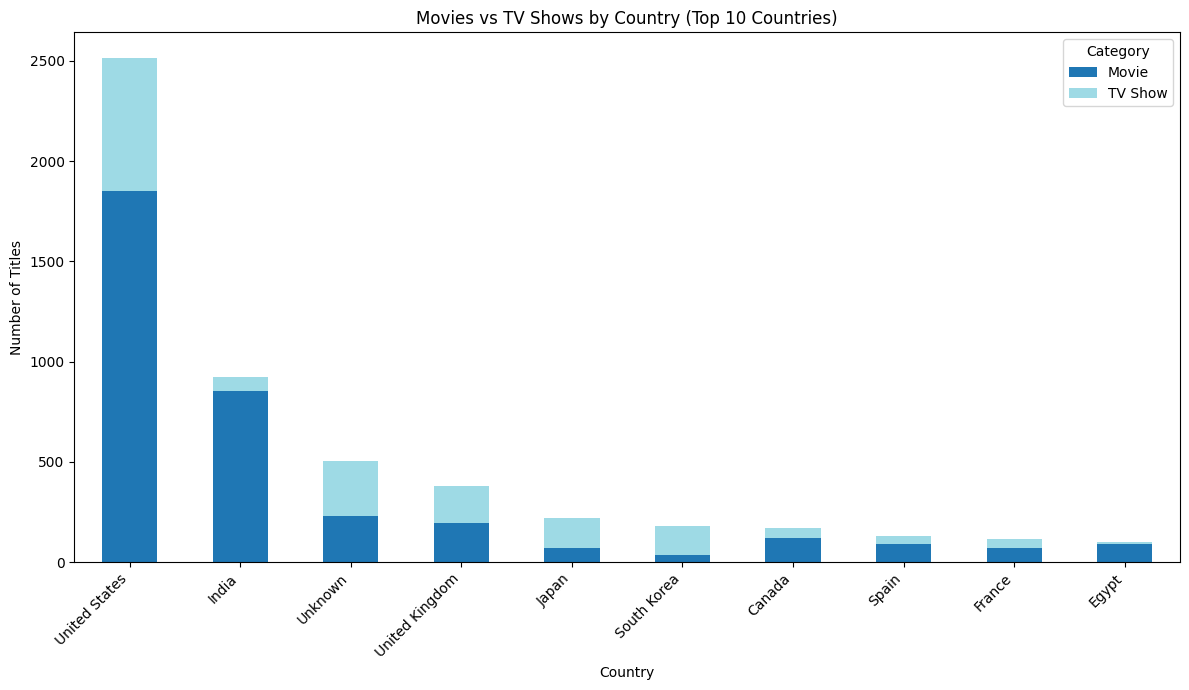

In [7]:
# --- Visualization 3: Movies vs TV Shows by Country (Top 10) ---
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is imported if not already in the cell

# Identify the top 10 countries based on total title count
# We use the cleaned 'Country' column which includes 'Unknown'
top_countries_list = df['Country'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only titles from these top countries
country_data = df[df['Country'].isin(top_countries_list)]

# Group by Country and Category, count titles, and reshape for stacking
# 'unstack' moves 'Category' index to columns ('Movie', 'TV Show')
# 'fill_value=0' handles countries potentially missing one category
stacked_country_category = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

# Reorder the rows to match the order of top_countries_list (usually makes chart clearer)
stacked_country_category = stacked_country_category.reindex(top_countries_list)

# Create the stacked bar chart
stacked_country_category.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.tight_layout() # Adjust plot to prevent labels overlapping

# Save the plot
plt.savefig("movies_vs_tvshows_by_country.png")

plt.show() # Display the plot

4. Choropleth Map: Global Content Distribution

In [8]:
# --- Visualization 4: Choropleth Map - Country-wise Content ---
import plotly.express as px # Make sure plotly express is imported

# Count the number of titles per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count'] # Rename columns for the map function

# Note: The original ipynb code did not split multi-country listings (e.g., "United Kingdom, United States").
# Plotly might not recognize these multi-country strings. For this map, titles with multiple countries
# might not be displayed or might only be partially counted if one country name matches.
# A more advanced approach would split these strings and potentially distribute counts,
# but we'll follow the simpler approach used in the ipynb for now.

# Create the interactive choropleth map
fig_map = px.choropleth(country_counts,
                        locations="Country",         # Column containing country names
                        locationmode="country names", # Tell plotly how to interpret the locations
                        color="Count",               # Data column that determines the color intensity
                        hover_name="Country",        # Column to show when hovering over a country
                        color_continuous_scale="viridis", # Color scheme for the map intensity
                        title="Global Distribution of Netflix Content by Country")

# Save the map as an interactive HTML file (optional)
# fig_map.write_html("content_by_country_map.html")

fig_map.show() # Display the interactive map in Colab

5. Line Chart: Trend of Top 5 Genres Over Time

Analyzing trends for Top 5 Genres: ['Dramas', 'Comedies', 'Documentaries', 'Action & Adventure', 'International TV Shows']


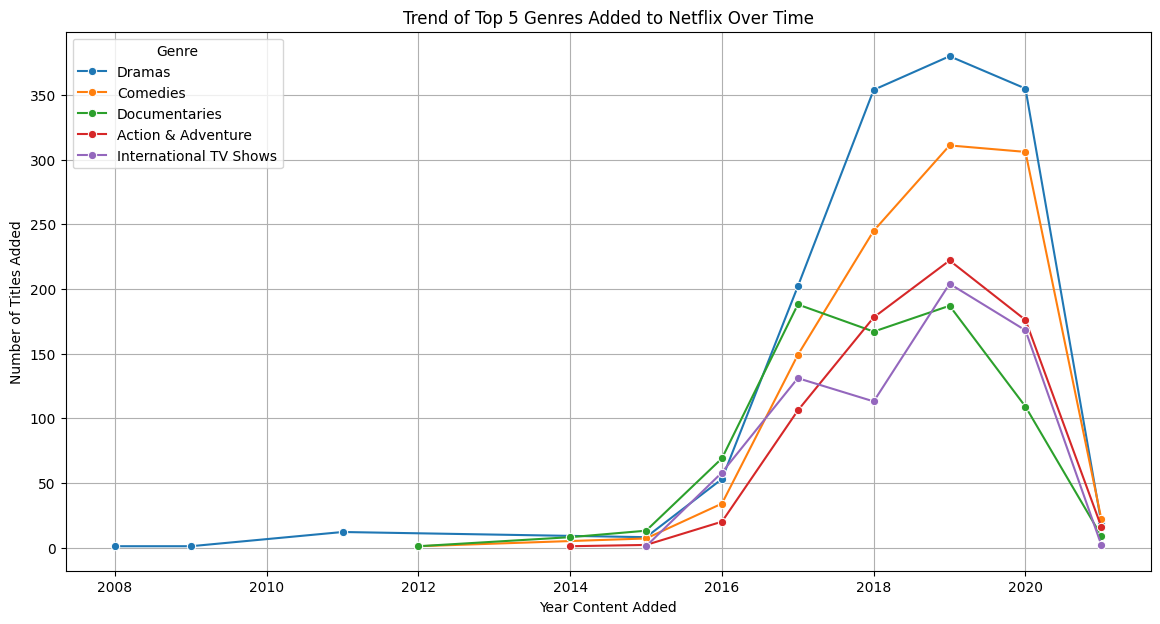


Analysis and Visualization Generation Complete.


In [9]:
# --- Visualization 5: Trend of Popular Genres Over Time ---
import matplotlib.pyplot as plt # Make sure these are imported
import seaborn as sns

# Identify the top 5 most popular genres based on overall count
popular_genres_list = df['Main_Genre'].value_counts().head(5).index.tolist()
print("Analyzing trends for Top 5 Genres:", popular_genres_list)

# Filter the DataFrame to include only titles from these top 5 genres
genre_trends_data = df[df['Main_Genre'].isin(popular_genres_list)]

# Group by Year and Main_Genre, then count the number of titles added each year for each genre
genre_trends = genre_trends_data.groupby(['Year','Main_Genre']).size().reset_index(name='Count')

# Create the line plot
plt.figure(figsize=(14, 7)) # Use a slightly wider figure for clarity
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Top 5 Genres Added to Netflix Over Time")
plt.xlabel("Year Content Added")
plt.ylabel("Number of Titles Added")
plt.legend(title="Genre")
plt.grid(True)

# Save the plot
plt.savefig("top_5_genre_trends.png")

plt.show() # Display the plot

print("\nAnalysis and Visualization Generation Complete.")